In [2]:
import numpy as np
import pandas as pd

In [8]:
import matplotlib.pyplot as plt

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 65.9 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 63.8 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 7.0/7.0 MB 69.8 MB/s  0:00:00

   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----------------- ---------------------- 3/7 [fonttools]
   ----------------- ---------------------- 3/7 [fonttools]
   ----------------- ---------------------- 3/7 [fonttools]
   ----------------- ---------------------- 3/7 [fonttools]
   ----------------- ---------------------- 3/7 [fonttools]
   ----------------- ---------------------- 3/7 [fonttools]
   ----------------- ---------------------- 3/7 [fonttools]
   ----------------- ---------------

Train Data - We know if the passenger survived or not

In [3]:
train_data = pd.read_csv("train.csv")

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data = pd.read_csv("test.csv")

In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Exploring patterns 

<Axes: title={'center': 'Count (Survived vs. Not Survived)'}, xlabel='Survived'>

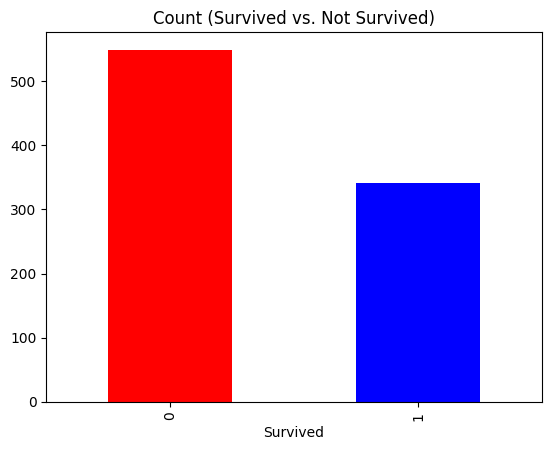

In [9]:
#How many passengers survived vs. how many didn't survive
train_data['Survived'].value_counts().plot(kind='bar', title='Count (Survived vs. Not Survived)', color=['red', 'blue'])

In [15]:
woman_survived = train_data.loc[train_data.Sex=='female']['Survived'].sum()
rate_woman_survived = woman_survived/train_data.loc[train_data.Sex=='female']['Survived'].count()
print("The rate of woman who survived is: ", rate_woman_survived*100)

The rate of woman who survived is:  74.20382165605095


In [16]:
man_survived = train_data.loc[train_data.Sex=='male']['Survived'].sum()
rate_man_survived = man_survived/train_data.loc[train_data.Sex=='male']['Survived'].count()
print("The rate of man who survived is: ", rate_man_survived*100)

The rate of man who survived is:  18.890814558058924


<Axes: title={'center': 'Siblings/Spouses Aboard vs. Survival Rate'}, xlabel='SibSp'>

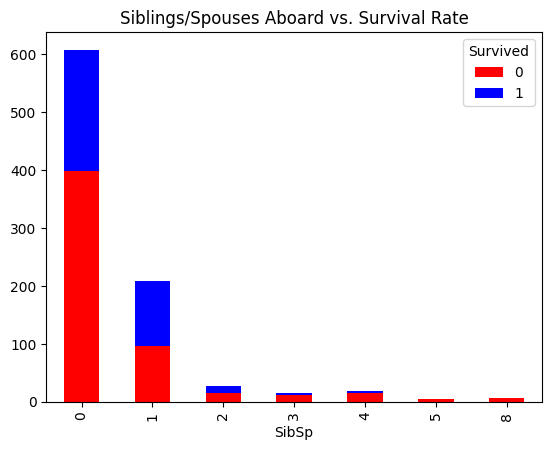

In [17]:
#Let's create a table where we can see the number of siblings/spouses aboard vs. survival rate
sibling_spouse_table = pd.crosstab(train_data['SibSp'], train_data['Survived'])
sibling_spouse_table.plot(kind='bar', stacked=True, title='Siblings/Spouses Aboard vs. Survival Rate', color=['red', 'blue'])

<Axes: title={'center': 'Parents/Children Aboard vs. Survival Rate'}, xlabel='Parch'>

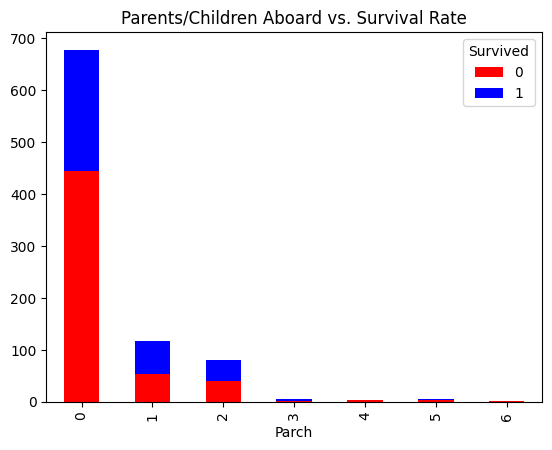

In [18]:
#Now, let's see the number of parents/children aboard vs. survival rate
parent_child_table = pd.crosstab(train_data['Parch'], train_data['Survived'])
parent_child_table.plot(kind='bar', stacked=True, title='Parents/Children Aboard vs. Survival Rate', color=['red', 'blue'])

<Axes: title={'center': 'Port of Embarkation vs. Survival Rate'}, xlabel='Embarked'>

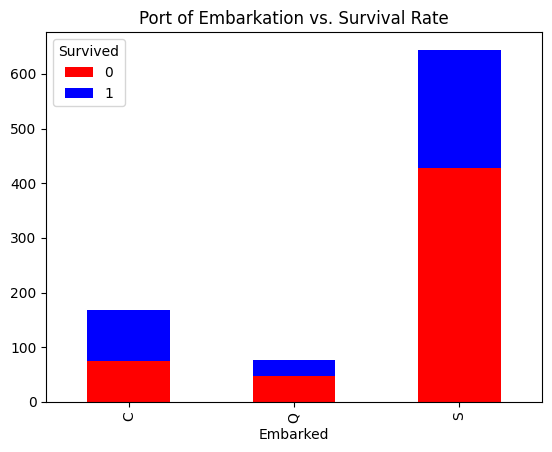

In [ ]:
#Let's verify if the place where the passenger embarked had an impact on survival rate
embarked_table = pd.crosstab(train_data['Embarked'], train_data['Survived'])
embarked_table.plot(kind='bar', stacked=True, title='Port of Embarkation vs. Survival Rate', color=['red', 'blue'])
#C = Cherbourg, Q = Queenstown, S = Southampton

<Axes: title={'center': 'Passenger Class vs. Survival Rate'}, xlabel='Pclass'>

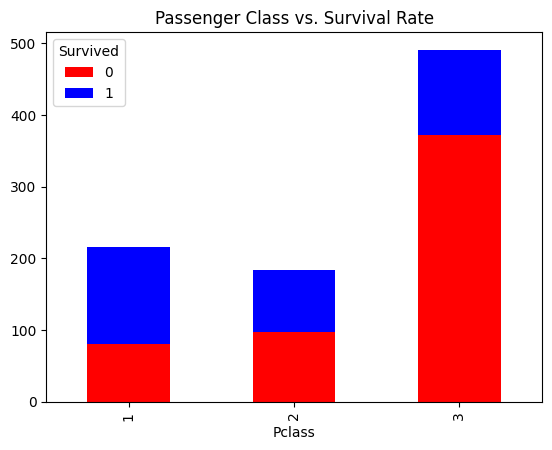

In [20]:
#The ticket class and its impact on survival rate
pclass_table = pd.crosstab(train_data['Pclass'], train_data['Survived'])
pclass_table.plot(kind='bar', stacked=True, title='Passenger Class vs. Survival Rate', color=['red', 'blue'])

Text(0, 0.5, 'Number of Passengers')

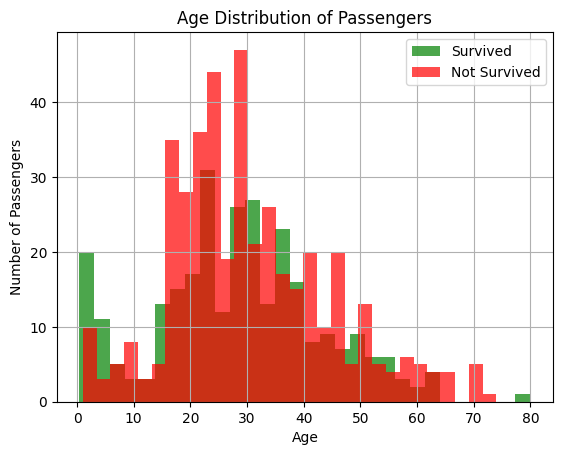

In [26]:
#Let's explore the age of the passengers and see if it had any impact on survival rate
train_data['Age'][train_data.Survived==1].hist(bins=30, color='green', alpha=0.7)
plt.title('Age Distribution of Passengers')
train_data['Age'][train_data.Survived==0].hist(bins=30, color='red', alpha=0.7)
plt.xlabel('Age')
#let's add a legend
plt.legend(['Survived', 'Not Survived'])
#let's add the legend for the axis 
plt.ylabel('Number of Passengers')